In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
from statsbombpy import sb 
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [3]:
 sb.events(match_id=18244)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Juventus,224,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",Real Madrid,220,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Juventus,224,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Mario Lemina,3951.0,NaN,Juventus,224,00:32:07.282,Substitution,NaN
3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Marco Asensio Willemsen,5719.0,NaN,Real Madrid,220,00:36:59.944,Substitution,NaN
3397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Álvaro Borja Morata Martín,3477.0,NaN,Real Madrid,220,00:43:40.836,Substitution,NaN
3398,"{'outcome': {'id': 1, 'name': 'Lost'}}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:21:59.754,50/50,True


In [4]:
events = sb.events(match_id=18244)

In [5]:
events.to_csv("Real.csv")

In [6]:
events = events[['team','type','minute','location','shot_end_location','shot_outcome']]

In [7]:
shots= events[((events['team']=='Real Madrid')&(events['type']=='Shot'))].reset_index()

In [8]:
shots

,index,team,type,minute,location,shot_end_location,shot_outcome
0,3311,Real Madrid,Shot,19,"[105.0, 44.0]","[119.0, 36.8, 0.2]",Goal
1,3315,Real Madrid,Shot,30,"[105.0, 42.0]","[110.0, 43.0]",Blocked
2,3316,Real Madrid,Shot,32,"[112.0, 45.0]","[115.0, 29.0]",Wayward
3,3319,Real Madrid,Shot,44,"[90.0, 54.0]","[119.0, 32.9, 0.5]",Off T
4,3320,Real Madrid,Shot,45,"[94.0, 48.0]","[99.0, 46.0]",Blocked
5,3321,Real Madrid,Shot,53,"[93.0, 38.0]","[118.0, 40.9, 1.1]",Saved
6,3322,Real Madrid,Shot,55,"[103.0, 26.0]","[120.0, 34.8, 4.2]",Off T
7,3323,Real Madrid,Shot,58,"[99.0, 32.0]","[120.0, 32.1, 3.8]",Off T
8,3324,Real Madrid,Shot,60,"[103.0, 29.0]","[114.0, 40.0]",Blocked
9,3325,Real Madrid,Shot,60,"[90.0, 34.0]","[120.0, 36.6, 0.6]",Goal


In [9]:

# Extract shot coordinates and convert to standard pitch coordinates
shots["X"] = shots["location"].apply(lambda loc: (120 - loc[0]) * 105 / 120)
shots["Y"] = shots["location"].apply(lambda loc: loc[1] * 68 / 100)
shots["C"] = shots["location"].apply(lambda loc: abs(loc[1] - 60) * 68 / 100)

# Calculate distance from goal
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)

# Calculate angle to goal
shots["Angle"] = np.where(
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) > 0,
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)),
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) + np.pi
)

# Determine if the shot was a goal
shots["Goal"] = shots["shot_outcome"].apply(lambda outcome: 1 if outcome == 'Goal' else 0).astype(object)


In [27]:
shots

,index,team,type,minute,location,shot_end_location,shot_outcome,X,Y,C,Distance,Angle,Goal,xG,D2,X2,C2,AX
0,3311,Real Madrid,Shot,19,"[105.0, 44.0]","[119.0, 36.8, 0.2]",Goal,13.125,29.92,10.88,17.048168,0.333585,1,1.000000e+00,290.640025,172.265625,118.3744,4.378303
1,3315,Real Madrid,Shot,30,"[105.0, 42.0]","[110.0, 43.0]",Blocked,13.125,28.56,12.24,17.946677,0.301734,0,4.960968e-10,322.083225,172.265625,149.8176,3.960256
2,3316,Real Madrid,Shot,32,"[112.0, 45.0]","[115.0, 29.0]",Wayward,7.000,30.60,10.20,12.370934,0.351679,0,7.167398e-11,153.040000,49.000000,104.0400,2.461751
3,3319,Real Madrid,Shot,44,"[90.0, 54.0]","[119.0, 32.9, 0.5]",Off T,26.250,36.72,4.08,26.565182,0.270733,0,4.493637e-94,705.708900,689.062500,16.6464,7.106749
4,3320,Real Madrid,Shot,45,"[94.0, 48.0]","[99.0, 46.0]",Blocked,22.750,32.64,8.16,24.169156,0.283892,0,8.802029e-11,584.148100,517.562500,66.5856,6.458539
5,3321,Real Madrid,Shot,53,"[93.0, 38.0]","[118.0, 40.9, 1.1]",Saved,23.625,25.84,14.96,27.963230,0.221329,0,4.896031e-11,781.942225,558.140625,223.8016,5.228905
6,3322,Real Madrid,Shot,55,"[103.0, 26.0]","[120.0, 34.8, 4.2]",Off T,14.875,17.68,23.12,27.491817,0.145627,0,2.561580e-112,755.800025,221.265625,534.5344,2.166203
7,3323,Real Madrid,Shot,58,"[99.0, 32.0]","[120.0, 32.1, 3.8]",Off T,18.375,21.76,19.04,26.460579,0.193404,0,7.128747e-75,700.162225,337.640625,362.5216,3.553807
8,3324,Real Madrid,Shot,60,"[103.0, 29.0]","[114.0, 40.0]",Blocked,14.875,19.72,21.08,25.799845,0.165416,0,1.734757e-101,665.632025,221.265625,444.3664,2.460557
9,3325,Real Madrid,Shot,60,"[90.0, 34.0]","[120.0, 36.6, 0.6]",Goal,26.250,23.12,17.68,31.648774,0.192039,1,1.000000e+00,1001.644900,689.062500,312.5824,5.041015


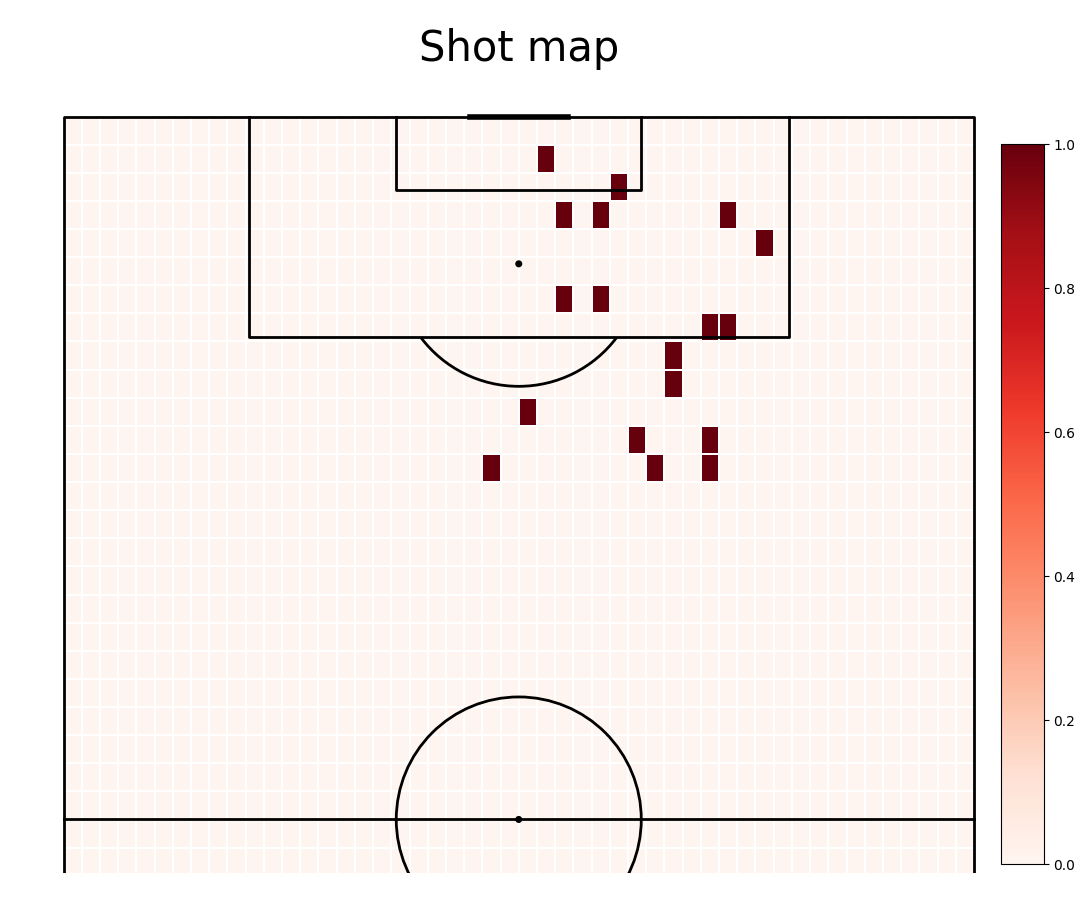

In [11]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#subtracting x from 105 but not y from 68 because of inverted Wyscout axis
#calculate number of shots in each bin
bin_statistic_shots = pitch.bin_statistic(105 - shots.X, shots.Y, bins=50)
#make heatmap
pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0.01)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot map' , fontsize = 30)
plt.show()

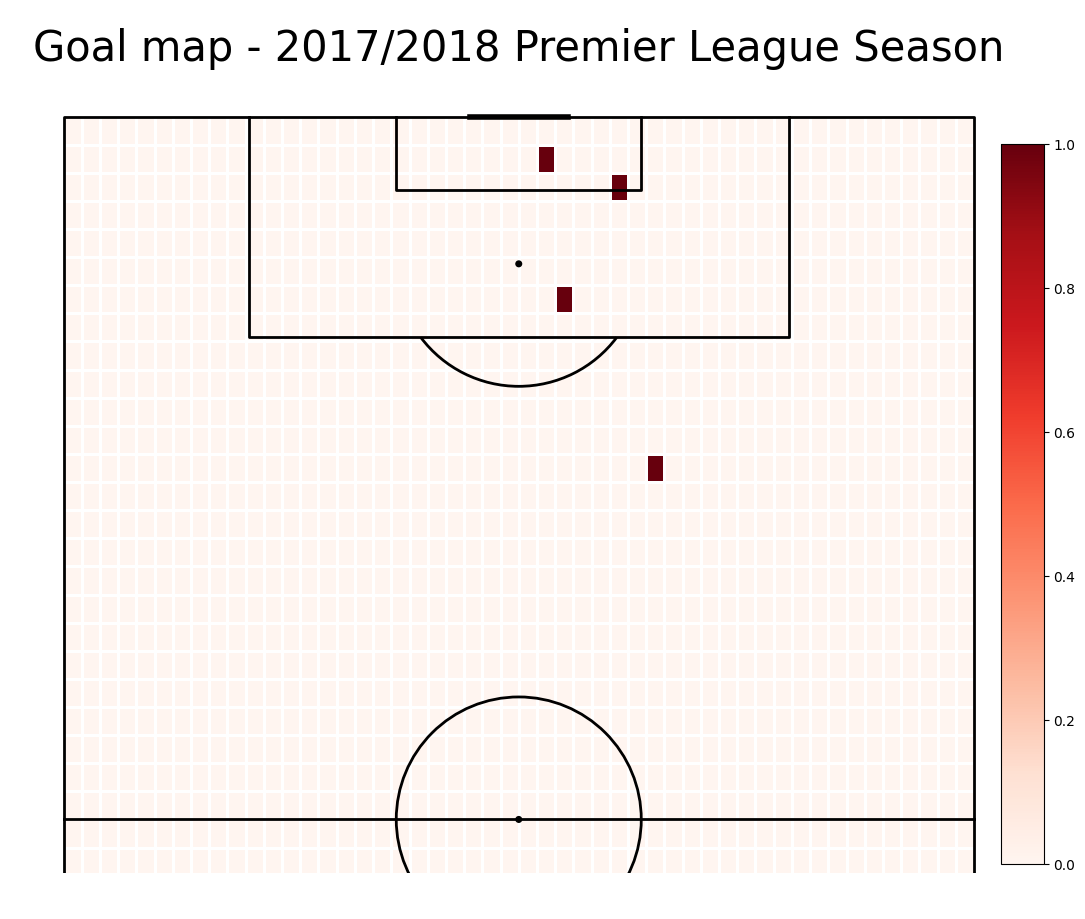

In [12]:
#take only goals
goals = shots.loc[shots["Goal"] == 1]
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#calculate number of goals in each bin
bin_statistic_goals = pitch.bin_statistic(105 - goals.X, goals.Y, bins=50)
#plot heatmap
pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Reds', edgecolor='white')
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal map - 2017/2018 Premier League Season' , fontsize = 30)
plt.show()

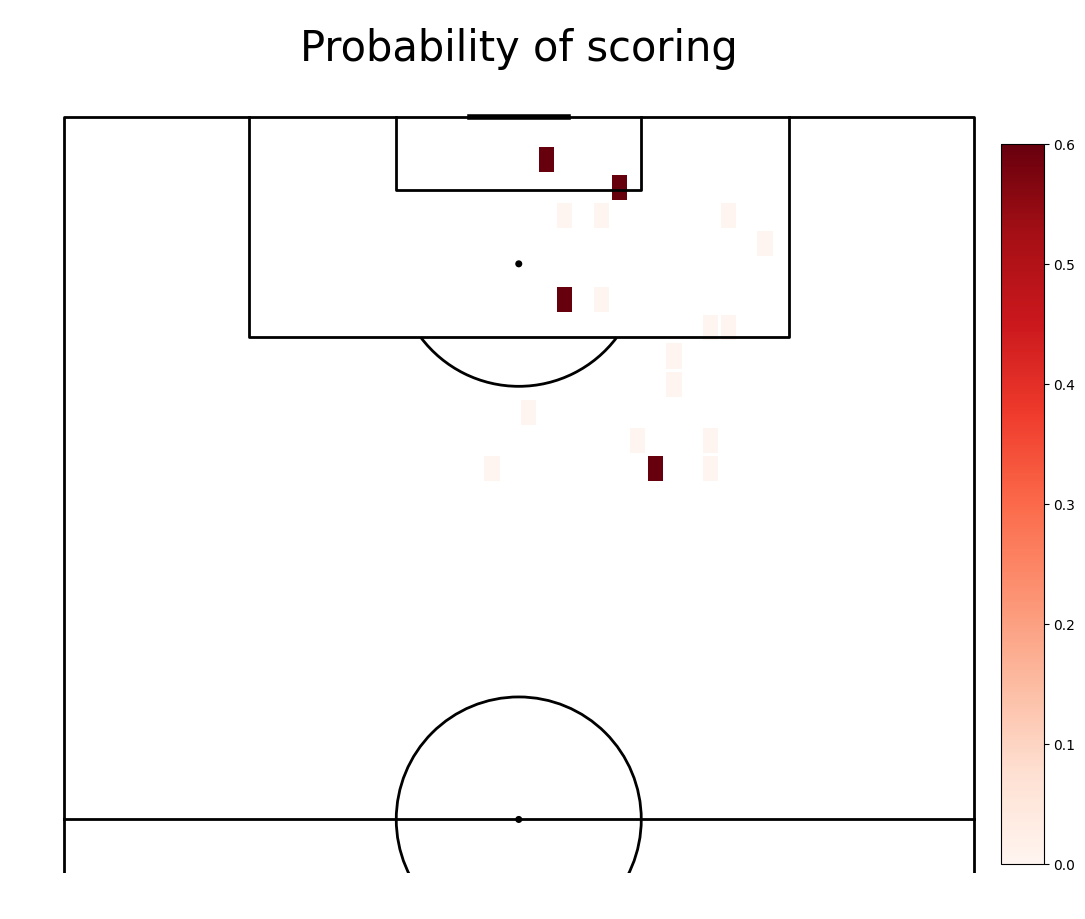

In [13]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots.X, shots.Y, bins = 50)
#normalize number of goals by number of shots
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show()

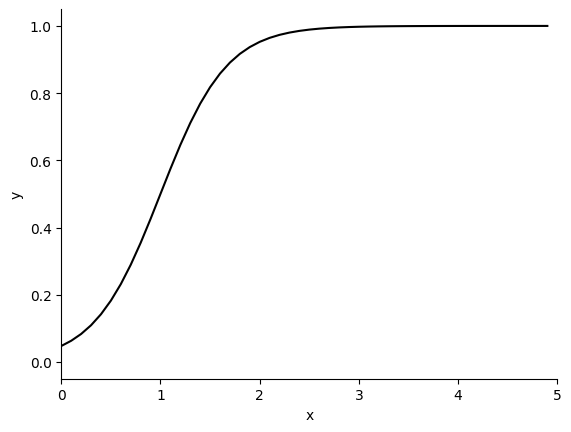

In [14]:
b = [3, -3]
x = np.arange(5, step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x))
fig,ax = plt.subplots()
plt.ylim((-0.05,1.05))
plt.xlim((0,5))
ax.set_ylabel('y')
ax.set_xlabel("x")
ax.plot(x, y, linestyle='solid', color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

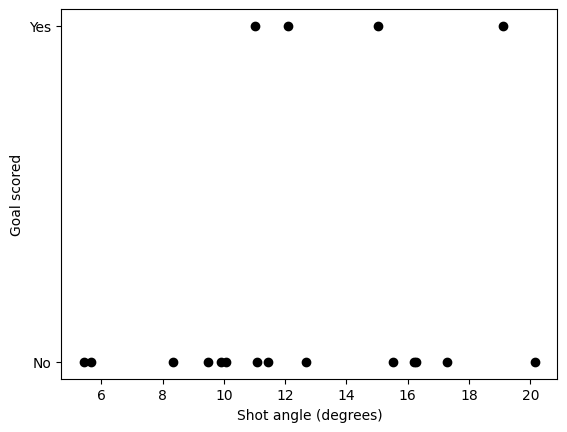

In [15]:
#first 200 shots
shots_200=shots.iloc[:200]
#plot first 200 shots goal angle
fig, ax = plt.subplots()
ax.plot(shots_200['Angle']*180/np.pi, shots_200['Goal'], linestyle='none', marker= '.', markersize= 12, color='black')
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

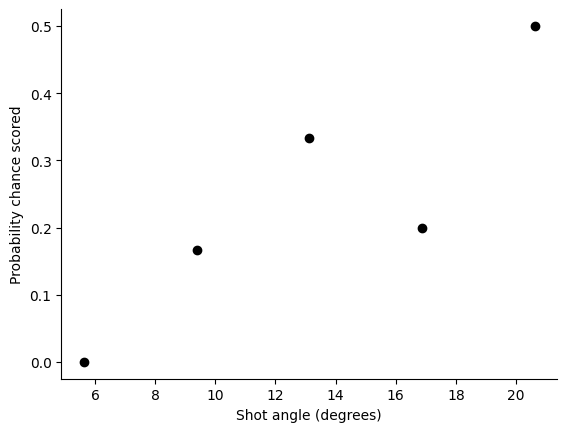

In [16]:
#number of shots from angle
shotcount_dist = np.histogram(shots['Angle']*180/np.pi, bins=40, range=[0, 150])
#number of goals from angle
goalcount_dist = np.histogram(goals['Angle']*180/np.pi, bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
#probability of scoring goal
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2
#make plot
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

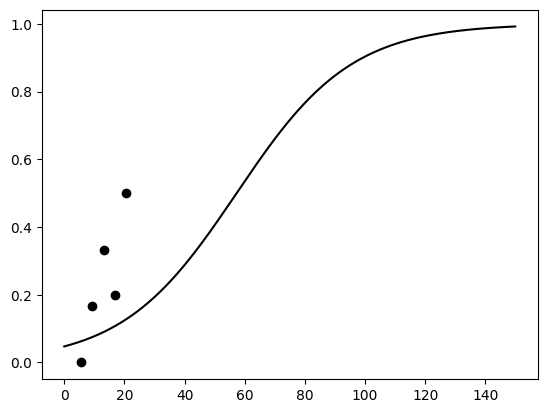

In [17]:
fig, ax = plt.subplots()
b = [3, -3]
x = np.arange(150,step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x*np.pi/180))
#plot line
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
#plot logistic function
ax.plot(x, y, linestyle='solid', color='black')
plt.show()

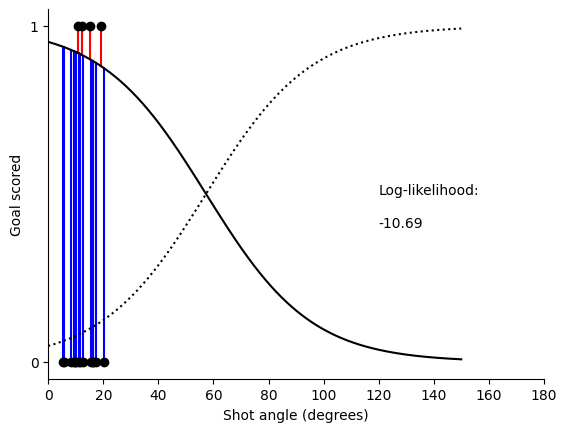

In [18]:
#calculate xG
xG = 1/(1+np.exp(b[0]+b[1]*shots['Angle']))
shots = shots.assign(xG = xG)
shots_40 = shots.iloc[:40]
fig, ax = plt.subplots()
#plot data
ax.plot(shots_40['Angle']*180/np.pi, shots_40['Goal'], linestyle='none', marker= '.', markersize= 12, color='black', zorder = 3)
#plot curves
ax.plot(x, y, linestyle=':', color='black', zorder = 2)
ax.plot(x, 1-y, linestyle='solid', color='black', zorder = 2)
#calculate loglikelihood
loglikelihood=0
for item,shot in shots_40.iterrows():
    ang = shot['Angle'] * 180/np.pi
    if shot['Goal'] == 1:
        loglikelihood = loglikelihood + np.log(shot['xG'])
        ax.plot([ang,ang],[shot['Goal'],1-shot['xG']], color='red', zorder = 1)
    else:
        loglikelihood = loglikelihood + np.log(1 - shot['xG'])
        ax.plot([ang,ang], [shot['Goal'], 1-shot['xG']], color='blue', zorder = 1)
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
plt.xlim((0,180))
plt.text(120,0.5,'Log-likelihood:')
plt.text(120,0.4,str(loglikelihood)[:6])
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                   18
Model:                                GLM   Df Residuals:                       16
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -9.0889
Date:                    Sun, 19 May 2024   Deviance:                       18.178
Time:                            13:49:01   Pearson chi2:                     17.2
No. Iterations:                         4   Pseudo R-squ. (CS):            0.04833
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

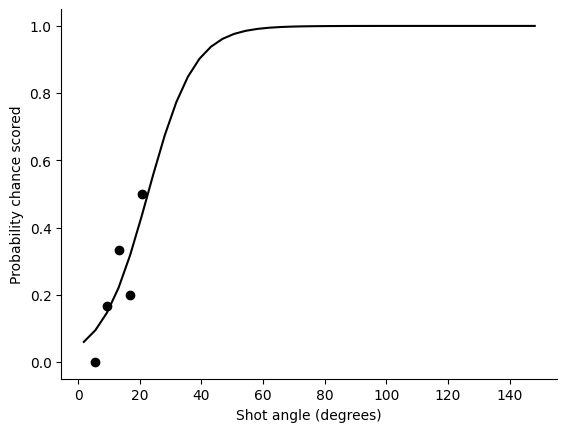

In [19]:
#create model
test_model = smf.glm(formula="Goal ~ Angle" , data=shots,
                           family=sm.families.Binomial()).fit()
print(test_model.summary())
#get params
b=test_model.params
#calculate xG
xGprob = 1/(1+np.exp(b[0]+b[1]*midangle*np.pi/180))
fig, ax = plt.subplots()
#plot data
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
#plot line
ax.plot(midangle, xGprob, linestyle='solid', color='black')
#make legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                   18
Model:                                GLM   Df Residuals:                       16
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -8.1919
Date:                    Sun, 19 May 2024   Deviance:                       16.384
Time:                            13:49:17   Pearson chi2:                     21.8
No. Iterations:                         5   Pseudo R-squ. (CS):             0.1386
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

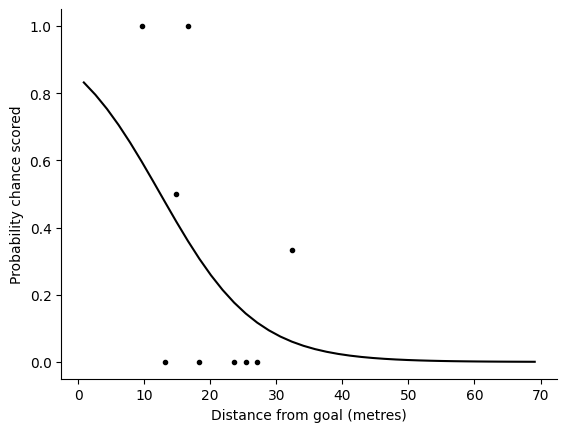

In [20]:
#number of shots
shotcount_dist = np.histogram(shots['Distance'],bins=40,range=[0, 70])
#number of goals
goalcount_dist = np.histogram(goals['Distance'],bins=40,range=[0, 70])
#empirical probability of scoring
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
#making a plot
fig, ax = plt.subplots()
#plotting data
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
#making legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#make single variable model of distance
test_model = smf.glm(formula="Goal ~ Distance" , data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
print(test_model.summary())
b=test_model.params
#calculate xG
xGprob=1/(1+np.exp(b[0]+b[1]*middistance))
#plot line
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                   18
Model:                                GLM   Df Residuals:                       15
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -7.3142
Date:                    Sun, 19 May 2024   Deviance:                       14.628
Time:                            13:49:28   Pearson chi2:                     14.0
No. Iterations:                         5   Pseudo R-squ. (CS):             0.2186
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

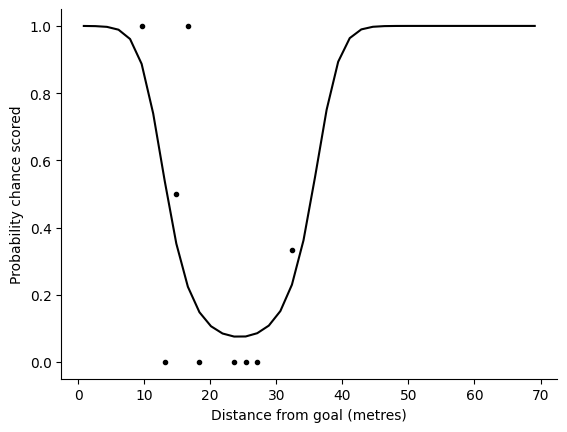

In [21]:
#calculating distance squared
shots["D2"] = shots['Distance']**2
#adding it to the model
test_model = smf.glm(formula="Goal ~ Distance + D2" , data=shots,
                           family=sm.families.Binomial()).fit()
#print model summary
print(test_model.summary())
#get parameters
b=test_model.params
#calculate xG
xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))
fig, ax = plt.subplots()
#plot line
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
#make legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                   18
Model:                                GLM   Df Residuals:                       15
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -8.1831
Date:                    Mon, 20 May 2024   Deviance:                       16.366
Time:                            10:22:43   Pearson chi2:                     22.3
No. Iterations:                         5   Pseudo R-squ. (CS):             0.1394
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

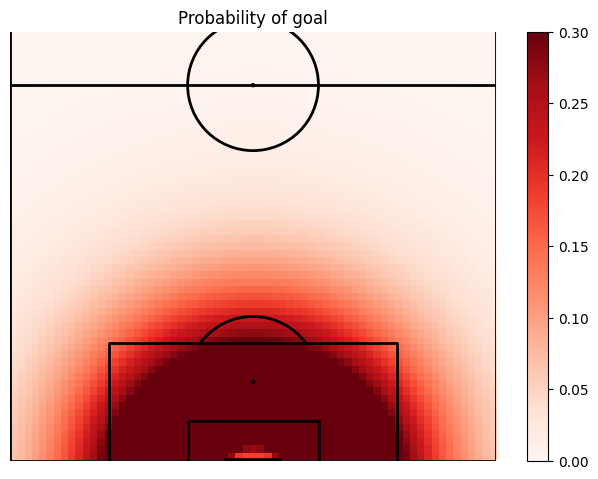

In [28]:
#creating extra variables
shots["X2"] = shots['X']**2
shots["C2"] = shots['C']**2
shots["AX"]  = shots['Angle']*shots['X']

# list the model variables you want here
model_variables = ['Angle','Distance']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

#fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
print(test_model.summary())
b=test_model.params

#return xG value for more general model
def calculate_xG(sh):
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum))
   return xG

#add an xG to my dataframe
xG=shots.apply(calculate_xG, axis=1)
shots = shots.assign(xG=xG)

#Create a 2D map of xG
pgoal_2d=np.zeros((68,68))
for x in range(68):
    for y in range(68):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        sh['D2'] = x**2 + abs(y-68/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-68/2)
        sh['C2'] = (y-68/2)**2

        pgoal_2d[x,y] =  calculate_xG(sh)

#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.draw()
#plot probability
pos = ax.imshow(pgoal_2d, extent=[-1,68,68,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3, zorder = 1)
fig.colorbar(pos, ax=ax)
#make legend
ax.set_title('Probability of goal')
plt.xlim((0,68))
plt.ylim((0,60))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Mcfaddens Rsquared 0.14175744371479304


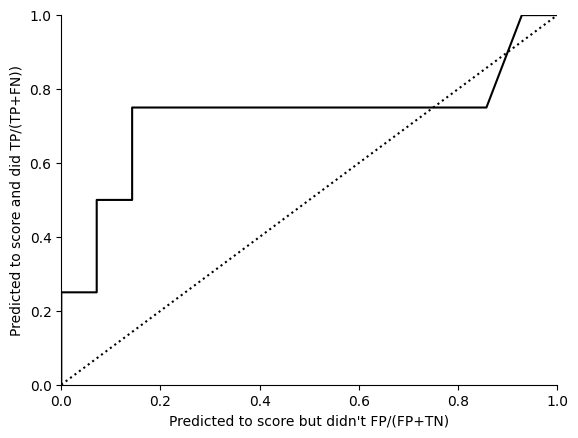

In [30]:
# Mcfaddens Rsquared for Logistic regression
null_model = smf.glm(formula="Goal ~ 1 ", data=shots,
                     family=sm.families.Binomial()).fit()
print("Mcfaddens Rsquared", 1 - test_model.llf / null_model.llf)

# ROC curve
numobs = 100
TP = np.zeros(numobs)
FP = np.zeros(numobs)
TN = np.zeros(numobs)
FN = np.zeros(numobs)

for i, threshold in enumerate(np.arange(0, 1, 1 / numobs)):
    for j, shot in shots.iterrows():
        if (shot['Goal'] == 1):
            if (shot['xG'] > threshold):
                TP[i] = TP[i] + 1
            else:
                FN[i] = FN[i] + 1
        if (shot['Goal'] == 0):
            if (shot['xG'] > threshold):
                FP[i] = FP[i] + 1
            else:
                TN[i] = TN[i] + 1

fig, ax = plt.subplots()
ax.plot(FP / (FP + TN), TP / (TP + FN), color='black')
ax.plot([0, 1], [0, 1], linestyle='dotted', color='black')
ax.set_ylabel("Predicted to score and did TP/(TP+FN))")
ax.set_xlabel("Predicted to score but didn't FP/(FP+TN)")
plt.ylim((0.00, 1.00))
plt.xlim((0.00, 1.00))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [35]:
shots['xG']=xG

In [36]:
shots

,index,team,type,minute,location,shot_end_location,shot_outcome,X,Y,C,Distance,Angle,Goal,xG,D2,X2,C2,AX
0,3311,Real Madrid,Shot,19,"[105.0, 44.0]","[119.0, 36.8, 0.2]",Goal,13.125,29.92,10.88,17.048168,0.333585,1,0.324787,290.640025,172.265625,118.3744,4.378303
1,3315,Real Madrid,Shot,30,"[105.0, 42.0]","[110.0, 43.0]",Blocked,13.125,28.56,12.24,17.946677,0.301734,0,0.305639,322.083225,172.265625,149.8176,3.960256
2,3316,Real Madrid,Shot,32,"[112.0, 45.0]","[115.0, 29.0]",Wayward,7.000,30.60,10.20,12.370934,0.351679,0,0.483155,153.040000,49.000000,104.0400,2.461751
3,3319,Real Madrid,Shot,44,"[90.0, 54.0]","[119.0, 32.9, 0.5]",Off T,26.250,36.72,4.08,26.565182,0.270733,0,0.114239,705.708900,689.062500,16.6464,7.106749
4,3320,Real Madrid,Shot,45,"[94.0, 48.0]","[99.0, 46.0]",Blocked,22.750,32.64,8.16,24.169156,0.283892,0,0.152761,584.148100,517.562500,66.5856,6.458539
5,3321,Real Madrid,Shot,53,"[93.0, 38.0]","[118.0, 40.9, 1.1]",Saved,23.625,25.84,14.96,27.963230,0.221329,0,0.100976,781.942225,558.140625,223.8016,5.228905
6,3322,Real Madrid,Shot,55,"[103.0, 26.0]","[120.0, 34.8, 4.2]",Off T,14.875,17.68,23.12,27.491817,0.145627,0,0.117830,755.800025,221.265625,534.5344,2.166203
7,3323,Real Madrid,Shot,58,"[99.0, 32.0]","[120.0, 32.1, 3.8]",Off T,18.375,21.76,19.04,26.460579,0.193404,0,0.127117,700.162225,337.640625,362.5216,3.553807
8,3324,Real Madrid,Shot,60,"[103.0, 29.0]","[114.0, 40.0]",Blocked,14.875,19.72,21.08,25.799845,0.165416,0,0.142958,665.632025,221.265625,444.3664,2.460557
9,3325,Real Madrid,Shot,60,"[90.0, 34.0]","[120.0, 36.6, 0.6]",Goal,26.250,23.12,17.68,31.648774,0.192039,1,0.063603,1001.644900,689.062500,312.5824,5.041015


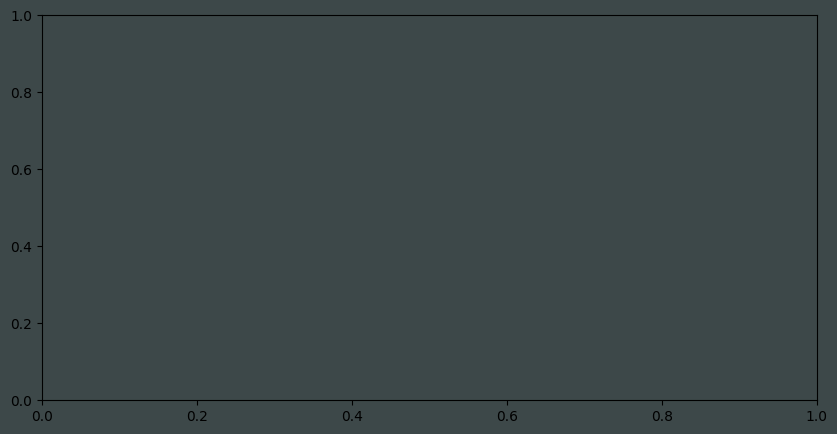

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor("#3d4849")
ax.patch.set_facecolor("#3d4849")

In [39]:
xG

0     0.324787
1     0.305639
2     0.483155
3     0.114239
4     0.152761
5     0.100976
6     0.117830
7     0.127117
8     0.142958
9     0.063603
10    0.627063
11    0.426876
12    0.204881
13    0.114042
14    0.057273
15    0.437870
16    0.133883
17    0.065046
dtype: float64